# **Setup**

In [53]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 

# **Data Import - CSV**

In [54]:
df = pd.read_excel("Online Retail.xlsx")

print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Data Import - UCI**

* UCI Dataset Link
https://archive.ics.uci.edu/dataset/352/online+retail

In [55]:
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 
y = online_retail.data.targets 
  
# metadata 
print(online_retail.metadata) 
print('\n')

# variable information 
online_retail.variables 

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

,name,role,type,demographic,description,units,missing_values
0,InvoiceNo,ID,Categorical,None,a 6-digit integral number uniquely assigned to...,None,no
1,StockCode,ID,Categorical,None,a 5-digit integral number uniquely assigned to...,None,no
2,Description,Feature,Categorical,None,product name,None,no
3,Quantity,Feature,Integer,None,the quantities of each product (item) per tran...,None,no
4,InvoiceDate,Feature,Date,None,the day and time when each transaction was gen...,None,no
5,UnitPrice,Feature,Continuous,None,product price per unit,sterling,no
6,CustomerID,Feature,Categorical,None,a 5-digit integral number uniquely assigned to...,None,no
7,Country,Feature,Categorical,None,the name of the country where each customer re...,None,no


In [56]:
online_retail.keys()

dict_keys(['data', 'metadata', 'variables'])

In [57]:
print(type(online_retail['data']))

online_retail['data']

<class 'ucimlrepo.dotdict.dotdict'>


{'ids':        InvoiceNo StockCode
 0         536365    85123A
 1         536365     71053
 2         536365    84406B
 3         536365    84029G
 4         536365    84029E
 ...          ...       ...
 541904    581587     22613
 541905    581587     22899
 541906    581587     23254
 541907    581587     23255
 541908    581587     22138
 
 [541909 rows x 2 columns],
 'features':                                 Description  Quantity      InvoiceDate  \
 0        WHITE HANGING HEART T-LIGHT HOLDER         6   12/1/2010 8:26   
 1                       WHITE METAL LANTERN         6   12/1/2010 8:26   
 2            CREAM CUPID HEARTS COAT HANGER         8   12/1/2010 8:26   
 3       KNITTED UNION FLAG HOT WATER BOTTLE         6   12/1/2010 8:26   
 4            RED WOOLLY HOTTIE WHITE HEART.         6   12/1/2010 8:26   
 ...                                     ...       ...              ...   
 541904          PACK OF 20 SPACEBOY NAPKINS        12  12/9/2011 12:50   
 541905        

In [58]:
online_retail['data']['ids'].head()

,InvoiceNo,StockCode
0,536365,85123A
1,536365,71053
2,536365,84406B
3,536365,84029G
4,536365,84029E


In [59]:
online_retail['data']['features'].head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [215]:
df = pd.merge(online_retail['data']['ids'],online_retail['data']['features'],
              left_index=True, right_index=True)

print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **Data Exploration**

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [217]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [218]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# **Data Cleaning**

In [219]:
df.isna().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [220]:
print('Dataframe Shape Before: ',df.shape)

# Drop Missing Value in CustomerID Col
df.dropna(subset=['CustomerID'],inplace=True)
print('Dataframe Shape After: ',df.shape)

Dataframe Shape Before:  (541909, 8)
Dataframe Shape After:  (406829, 8)


In [221]:
df.isna().sum() 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Data Processing**

## **Change CustomerID Dtype**

In [222]:
df['CustomerID'].dtype

dtype('float64')

In [223]:
print('Current CustomerID Data Type:', df['CustomerID'].dtypes)

df['CustomerID'] = df['CustomerID'].astype(int)

print('New CustomerID Data Type:', df['CustomerID'].dtypes)

Current CustomerID Data Type: float64
New CustomerID Data Type: int32


## **Change Datatime Format**

In [224]:
df['InvoiceDate'].head()

0    12/1/2010 8:26
1    12/1/2010 8:26
2    12/1/2010 8:26
3    12/1/2010 8:26
4    12/1/2010 8:26
Name: InvoiceDate, dtype: object

In [225]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


## **Add Invoice Year & Month**

In [226]:
df['Invoice_Year'] = df['InvoiceDate'].dt.year
df['Invoice_Month'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m-01'))

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  object        
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  int32         
 7   Country        406829 non-null  object        
 8   Invoice_Year   406829 non-null  int32         
 9   Invoice_Month  406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(5)
memory usage: 31.0+ MB


In [228]:
df.loc[:,['InvoiceDate','Invoice_Year','Invoice_Month']].head()

,InvoiceDate,Invoice_Year,Invoice_Month
0,2010-12-01 08:26:00,2010,2010-12-01
1,2010-12-01 08:26:00,2010,2010-12-01
2,2010-12-01 08:26:00,2010,2010-12-01
3,2010-12-01 08:26:00,2010,2010-12-01
4,2010-12-01 08:26:00,2010,2010-12-01


## **Add Cohort Year & Month**

* Cohort Month = Customer Acquisition Month

In [229]:
df['Cohort_Date'] = df.groupby(by='CustomerID')['InvoiceDate'].transform("min")
df['Cohort_Year'] = df['Cohort_Date'].dt.year
df['Cohort_Month'] = df['Cohort_Date'].apply(lambda x: x.strftime('%Y-%m-01'))

In [230]:
df['Cohort_Duration'] = ((df['InvoiceDate'] - df['Cohort_Date']).dt.days/30.41 + 1).astype(int)

df.loc[:,['InvoiceDate','Cohort_Date','Cohort_Year','Cohort_Month','Cohort_Duration']].tail()

,InvoiceDate,Cohort_Date,Cohort_Year,Cohort_Month,Cohort_Duration
541904,2011-12-09 12:50:00,2011-08-18 15:44:00,2011,2011-08-01,4
541905,2011-12-09 12:50:00,2011-08-18 15:44:00,2011,2011-08-01,4
541906,2011-12-09 12:50:00,2011-08-18 15:44:00,2011,2011-08-01,4
541907,2011-12-09 12:50:00,2011-08-18 15:44:00,2011,2011-08-01,4
541908,2011-12-09 12:50:00,2011-08-18 15:44:00,2011,2011-08-01,4


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  int64         
 4   InvoiceDate      406829 non-null  datetime64[ns]
 5   UnitPrice        406829 non-null  float64       
 6   CustomerID       406829 non-null  int32         
 7   Country          406829 non-null  object        
 8   Invoice_Year     406829 non-null  int32         
 9   Invoice_Month    406829 non-null  object        
 10  Cohort_Date      406829 non-null  datetime64[ns]
 11  Cohort_Year      406829 non-null  int32         
 12  Cohort_Month     406829 non-null  object        
 13  Cohort_Duration  406829 non-null  int32         
dtypes: datetime64[ns](2), flo

# **Cohort Table**

In [232]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Year', 'Invoice_Month',
       'Cohort_Date', 'Cohort_Year', 'Cohort_Month', 'Cohort_Duration'],
      dtype='object')

In [233]:
df.loc[:,['InvoiceDate','Invoice_Year','Invoice_Month',
          'Cohort_Date','Cohort_Year','Cohort_Month','Cohort_Duration']].tail()

,InvoiceDate,Invoice_Year,Invoice_Month,Cohort_Date,Cohort_Year,Cohort_Month,Cohort_Duration
541904,2011-12-09 12:50:00,2011,2011-12-01,2011-08-18 15:44:00,2011,2011-08-01,4
541905,2011-12-09 12:50:00,2011,2011-12-01,2011-08-18 15:44:00,2011,2011-08-01,4
541906,2011-12-09 12:50:00,2011,2011-12-01,2011-08-18 15:44:00,2011,2011-08-01,4
541907,2011-12-09 12:50:00,2011,2011-12-01,2011-08-18 15:44:00,2011,2011-08-01,4
541908,2011-12-09 12:50:00,2011,2011-12-01,2011-08-18 15:44:00,2011,2011-08-01,4


## **Cohort Data**

In [234]:
Cohort_Data = df.groupby(['Cohort_Month','Cohort_Duration'])['CustomerID'].nunique().reset_index()
Cohort_Data.head(10)

,Cohort_Month,Cohort_Duration,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,353
2,2010-12-01,3,348
3,2010-12-01,4,375
4,2010-12-01,5,328
5,2010-12-01,6,364
6,2010-12-01,7,348
7,2010-12-01,8,332
8,2010-12-01,9,341
9,2010-12-01,10,365


## **Cohort Data Pivoting**

In [238]:
Cohort_Pivot_Table = Cohort_Data.pivot(index='Cohort_Month',columns='Cohort_Duration',values='CustomerID')
Cohort_Pivot_Table

Cohort_Duration,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
2010-12-01,948.0,353.0,348.0,375.0,328.0,364.0,348.0,332.0,341.0,365.0,395.0,473.0,100.0
2011-01-01,421.0,106.0,123.0,125.0,128.0,124.0,106.0,116.0,143.0,152.0,113.0,4.0,NaN
2011-02-01,380.0,84.0,100.0,108.0,80.0,106.0,94.0,107.0,110.0,89.0,2.0,NaN,NaN
2011-03-01,440.0,87.0,107.0,102.0,83.0,97.0,107.0,118.0,95.0,14.0,NaN,NaN,NaN
2011-04-01,299.0,80.0,57.0,67.0,55.0,71.0,71.0,69.0,7.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,54.0,45.0,57.0,71.0,65.0,69.0,3.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,40.0,50.0,58.0,69.0,64.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,35.0,42.0,43.0,46.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,39.0,50.0,38.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Pivot Table Heatmap**

<Axes: xlabel='Cohort_Duration', ylabel='Cohort_Month'>

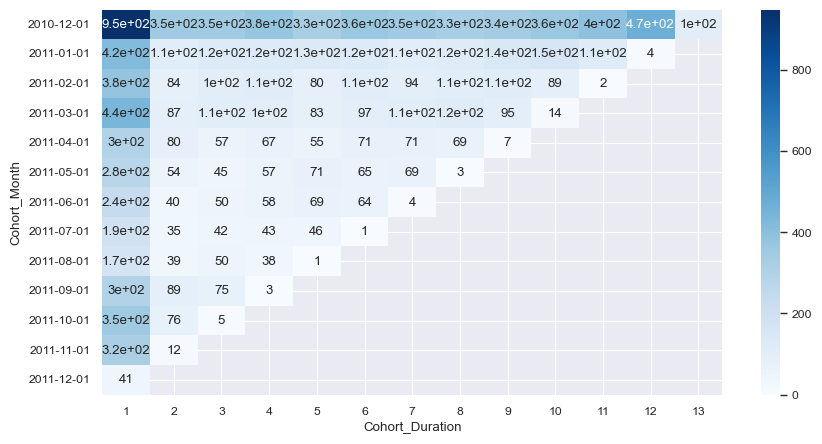

In [252]:
plt.figure(figsize=(10,5))
sns.heatmap(Cohort_Pivot_Table,vmin=0,annot=True,cmap='Blues')

## **Change Cohort Month Format**

In [254]:
# Convert Format Of Index Column
Cohort_Pivot_Table.index = pd.to_datetime(Cohort_Pivot_Table.index).strftime('%B %Y')
Cohort_Pivot_Table

Cohort_Duration,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
December 2010,948.0,353.0,348.0,375.0,328.0,364.0,348.0,332.0,341.0,365.0,395.0,473.0,100.0
January 2011,421.0,106.0,123.0,125.0,128.0,124.0,106.0,116.0,143.0,152.0,113.0,4.0,NaN
February 2011,380.0,84.0,100.0,108.0,80.0,106.0,94.0,107.0,110.0,89.0,2.0,NaN,NaN
March 2011,440.0,87.0,107.0,102.0,83.0,97.0,107.0,118.0,95.0,14.0,NaN,NaN,NaN
April 2011,299.0,80.0,57.0,67.0,55.0,71.0,71.0,69.0,7.0,NaN,NaN,NaN,NaN
May 2011,279.0,54.0,45.0,57.0,71.0,65.0,69.0,3.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,40.0,50.0,58.0,69.0,64.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,35.0,42.0,43.0,46.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,39.0,50.0,38.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Change Count Values To Percentage**

* Count Values as percentage of the Initial Cohort Size

In [258]:
Cohort_Pivot_Table_Percent = Cohort_Pivot_Table.divide(Cohort_Pivot_Table.iloc[:,0],axis=0)
Cohort_Pivot_Table_Percent

Cohort_Duration,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
December 2010,1.0,0.372363,0.367089,0.395570,0.345992,0.383966,0.367089,0.350211,0.359705,0.385021,0.416667,0.498945,0.105485
January 2011,1.0,0.251781,0.292162,0.296912,0.304038,0.294537,0.251781,0.275534,0.339667,0.361045,0.268409,0.009501,NaN
February 2011,1.0,0.221053,0.263158,0.284211,0.210526,0.278947,0.247368,0.281579,0.289474,0.234211,0.005263,NaN,NaN
March 2011,1.0,0.197727,0.243182,0.231818,0.188636,0.220455,0.243182,0.268182,0.215909,0.031818,NaN,NaN,NaN
April 2011,1.0,0.267559,0.190635,0.224080,0.183946,0.237458,0.237458,0.230769,0.023411,NaN,NaN,NaN,NaN
May 2011,1.0,0.193548,0.161290,0.204301,0.254480,0.232975,0.247312,0.010753,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.170213,0.212766,0.246809,0.293617,0.272340,0.017021,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.183246,0.219895,0.225131,0.240838,0.005236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.233533,0.299401,0.227545,0.005988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Heatmap Of Final Pivot Table**

In [271]:
# Current Palette
sns.color_palette('bone')

[(0.12352941176470589, 0.12352936342706163, 0.17186700767263427),
 (0.25049019607843137, 0.25049009806043054, 0.3485080988917306),
 (0.3740196078431372, 0.3944852761182057, 0.49901949512261384),
 (0.5009803921568627, 0.5690563247931928, 0.6259803080024994),
 (0.6245098039215686, 0.7389092370175045, 0.7495097475613068),
 (0.8069852246322835, 0.8764705882352941, 0.8764705604411924)]

<Axes: xlabel='Cohort_Duration', ylabel='Cohort_Month'>

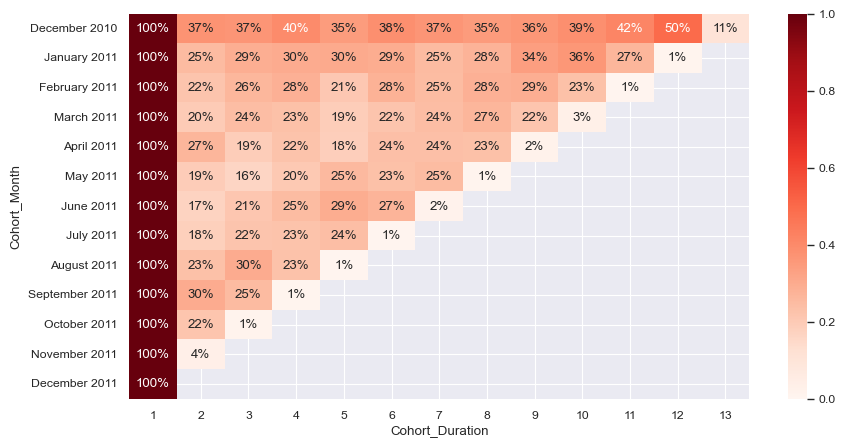

In [274]:
plt.figure(figsize=(10,5))
sns.heatmap(Cohort_Pivot_Table_Percent,annot=True,vmin=0,vmax=1,cmap='Reds',fmt='.0%')